# Import Library

In [4]:
# Import library yang dibutuhkan
# Untuk operasi matematika
import numpy as np
# Untuk manipulasi data
import pandas as pd
# Untuk visualisasi
import matplotlib.pyplot as plt
# Untuk membagi data
from sklearn.model_selection import train_test_split
# Untuk normalisasi
from sklearn.preprocessing import StandardScaler
# Algoritma KNN
from sklearn.neighbors import KNeighborsClassifier
# Evaluasi model
from sklearn.metrics import accuracy_score, classification_report
# Dataset kanker dari Scikit-Learn
from sklearn.datasets import load_breast_cancer

# Load Dataset kanker Payudara

In [19]:
# Load dataset kanker payudara dari Scikit-Learn
data = load_breast_cancer()

# Konversi ke DataFrame agar mudah dibaca
df = pd.DataFrame(data.data, columns=data.feature_names)

# Tambahkan kolom target (0 = Jinak, 1 = Ganas)
df['target'] = data.target

# Tampilkan 5 data pertama
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


penjelasan
*   Item daftar
*   Dataset ini memiliki 30 fitur medis.
Kolom target memiliki 0 = Jinak dan 1 = Ganas.




In [29]:
# Cek jumlah data dan fitur
print(f"Jumlah sampel (pasien): {data.data.shape[0]}")
print(f"Jumlah fitur: {data.data.shape[1]}")

Jumlah sampel (pasien): 569
Jumlah fitur: 30


# Pisahkan Data Menjadi Fitur (X) dan Label (y)

In [23]:
# Pisahkan fitur (X) dan label (y)
X = df.drop(columns=['target'])  # Semua kolom kecuali 'target' adalah fitur
y = df['target']  # Kolom target sebagai label

# Bagi Data Menjadi Training dan Testing

In [24]:
# Bagi dataset menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek ukuran data setelah pembagian
print(f"Ukuran X_train: {X_train.shape}, Ukuran y_train: {y_train.shape}")
print(f"Ukuran X_test: {X_test.shape}, Ukuran y_test: {y_test.shape}")

Ukuran X_train: (455, 30), Ukuran y_train: (455,)
Ukuran X_test: (114, 30), Ukuran y_test: (114,)


Penjelasan
*   80% data untuk melatih model (training).
*   20% data untuk menguji model (testing).





#  Normalisasi Data (Standardisasi)

In [8]:
# Inisialisasi StandardScaler untuk normalisasi data
scaler = StandardScaler()

# Fit dan transform data training
X_train = scaler.fit_transform(X_train)

# Transform data testing menggunakan scaler yang sama
X_test = scaler.transform(X_test)

Penjelasan


*   Standardisasi membuat data lebih stabil untuk model ML.
*   Semua nilai diubah ke skala yang sama.



# Pilih Model dan Latih (Training)

In [9]:
# Inisialisasi model KNN dengan K=3
model = KNeighborsClassifier(n_neighbors=3)

# Latih model dengan data training
model.fit(X_train, y_train)

print("Model berhasil dilatih!")

Model berhasil dilatih!


Penjelasan
*   KNN (K-Nearest Neighbors) mencari tetangga terdekat untuk
  menentukan kelas.
*  Semakin kecil K, semakin detail modelnya.



# Predict & Evaluate

In [10]:
# Prediksi data uji
y_pred = model.predict(X_test)

# Hitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.2f}")

# Tampilkan laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

Akurasi Model: 0.95
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



penjelasan
* Akurasi menunjukkan seberapa baik model dalam memprediksi kanker.
* Classification Report menunjukkan detail kinerja model.

# Uji Model dengan Data Baru

In [18]:
# Pilih satu sampel dari X_test
sample_data = X_test[0].reshape(1, -1)

# Prediksi kelasnya
predicted_class = model.predict(sample_data)

# Tampilkan hasil prediksi
status = "Ganas" if predicted_class[0] == 1 else "Jinak"
print(f"Prediksi: {status}")

Prediksi: Ganas


# Visualisasi Data

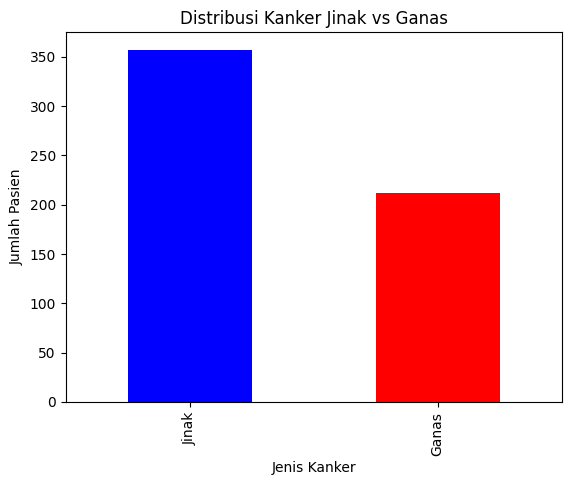

In [15]:
# Hitung jumlah data di setiap kelas
df['target'].value_counts().plot(kind='bar', color=['blue', 'red'])

# Tambahkan label
plt.xlabel("Jenis Kanker")
plt.ylabel("Jumlah Pasien")
plt.title("Distribusi Kanker Jinak vs Ganas")
plt.xticks(ticks=[0, 1], labels=["Jinak", "Ganas"])
plt.show()

penjelasan
* Grafik batang menunjukkan jumlah pasien kanker jinak dan ganas.